In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [3]:
path = '../../OBSERVATIONS/GAMA/GAMA_Galaxies/GAMA_sample1.csv'
gama = pd.read_csv(path) 
gama

,CATAID,RA,DEC,CATAID.1,Z,nQ,SURVEY_CODE,Z_TONRY,logmstar,dellogmstar
0,6802,174.00600,0.72093,6802,0.05054,4,5,0.051814,9.076030,0.131666
1,6806,174.02279,0.70594,6806,0.33124,4,5,0.332854,10.979200,0.099166
2,6808,174.10071,0.65891,6808,0.22936,4,5,0.230851,10.791600,0.098116
3,6810,174.10908,0.80390,6810,0.32630,4,5,0.327908,11.119700,0.096136
4,6816,174.01896,0.66580,6816,0.07641,4,5,0.077715,9.012390,0.146456
...,...,...,...,...,...,...,...,...,...,...
113153,4321789,219.54175,1.20398,4321789,0.29884,4,5,0.299822,10.410600,0.131773
113154,4322179,220.18208,1.03991,4322179,0.22929,3,5,0.230207,9.689020,0.164714
113155,4327264,215.73183,1.66110,4327264,0.00006,4,5,0.000001,0.464692,0.168939
113156,4327642,222.77558,1.53559,4327642,0.00034,4,5,0.000004,1.253310,0.103429


### HISTOGRAMS

- great way to represent the distribution of your data visually. They show the frequency, or number of occurences, of the data. 

Text(0.5, 1.0, 'Histogram of GAMA redshifts')

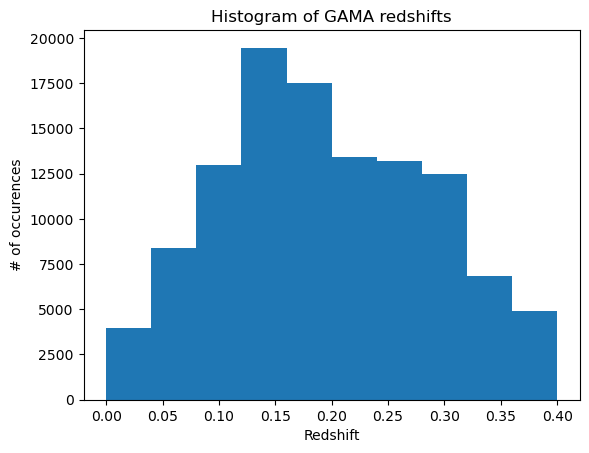

In [4]:
# To look at the histogram of one feature: 
Z = gama['Z']
plt.hist(Z) 
plt.xlabel('Redshift') ; plt.ylabel('# of occurences') ; plt.title('Histogram of GAMA redshifts')

You can **"bin"** data by grouping it together so that all data within the same intervals is represented as one bin. This sometimes helps visualize the distribution and is useful for other techniques (described in a later notebook) - ie. If you have data with many very different values and few instances of those values, a histogram that is not binned will look very "blocky", but by binning the data together you have relatively similar values counted together, giving a "smoother" distribution. 

There are many ways to bin your data. *Scipy* offers a way to manually bin your data and is very customizable, returning the information on the bins such as the bin edges and how many instances are in each bin. *Matplotlib* allows you to bin your data directly when creating the plot, and will most likely be the easiest for one's use case. 

Text(0.5, 1.0, 'Binned histogram of GAMA redshifts')

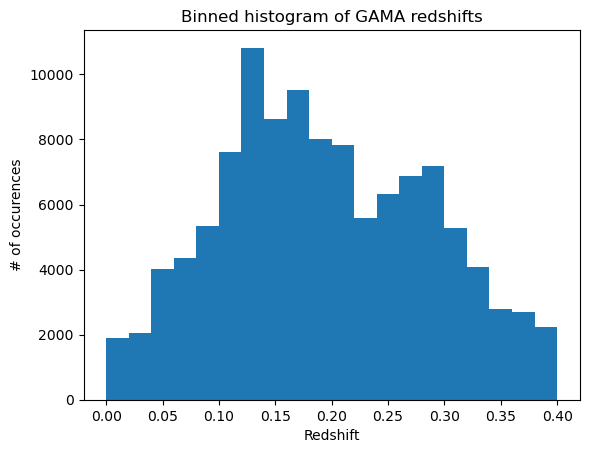

In [5]:
# To bin directly with plt, just declare how many bins you'd like (for now this decision can be pretty abstract):
n_bins = 20
plt.hist(Z, bins = n_bins)  
plt.xlabel('Redshift') ; plt.ylabel('# of occurences') ; plt.title('Binned histogram of GAMA redshifts')

Notice how the histogram changes in appearance as you change the number of bins. 

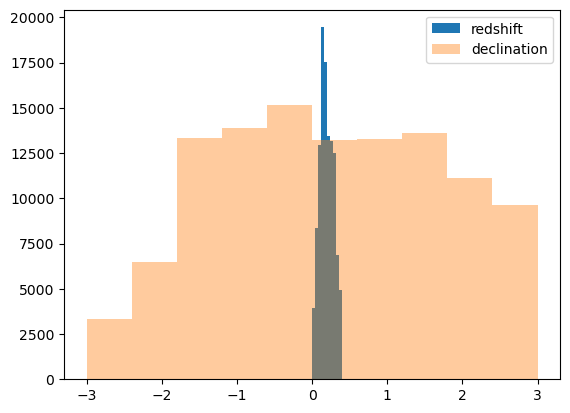

In [6]:
# You can plot two histograms on top of each other in the same plot (often only useful when the values are similar)
dec = gama['DEC']
plt.hist(Z, label = 'redshift')
plt.hist(dec, alpha = 0.4, label='declination') # set a lower alpha value to allow visualization of plots on top of each other
plt.legend()

### Summary Statistics

- histograms are visual representations of many of the summary statistics we often want to know for a given parameter or set of data. 
- *Numpy* offers very fast and efficient ways to calculate many of these, including: mean (average), median, and standard deviation. 

In [7]:
# Find the mean, median, and standard deviation for the redshifts in our GAMA DataFrame: 
z_mean = np.mean(Z)
z_median = np.median(Z)
z_std = np.std(Z)

print("mean Z: ", z_mean, "\n"
      "median Z: ", z_median, "\n", 
      "standard deviation: ", z_std)

mean Z:  0.1946830671273794 
median Z:  0.1861 
 standard deviation:  0.09238287783430377


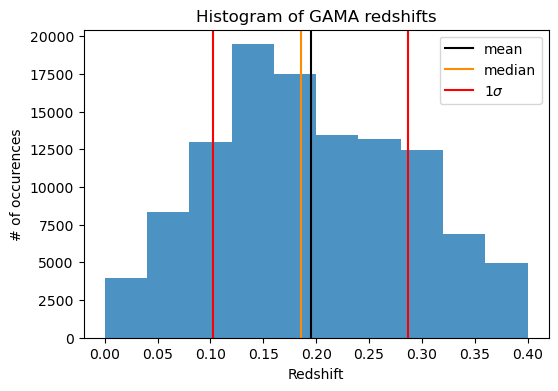

In [8]:
# Let's visualize this on the histogram 
plt.figure(figsize = (6, 4))
plt.hist(Z, alpha = 0.8) 
plt.xlabel('Redshift') ; plt.ylabel('# of occurences') ; plt.title('Histogram of GAMA redshifts')

# Add summary statistics
plt.axvline(x = z_mean, c = 'k', label = 'mean')
plt.axvline(x = z_median, c = 'darkorange', label = 'median')
plt.axvline(x = z_mean-z_std, c = 'red', label = '1$\sigma$')
plt.axvline(x = z_mean+z_std, c = 'red')
plt.legend()

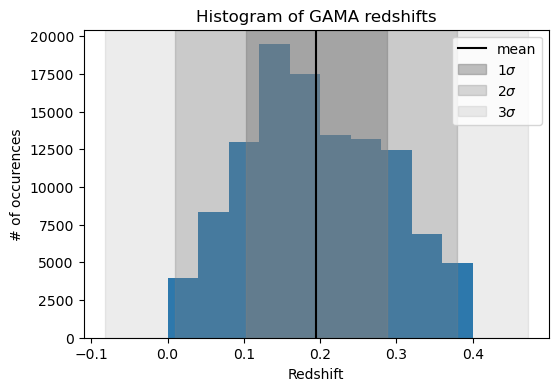

In [9]:
# Showing the standard deviations: 
# Let's visualize this on the histogram 
plt.figure(figsize = (6, 4))
plt.hist(Z) 
plt.xlabel('Redshift') ; plt.ylabel('# of occurences') ; plt.title('Histogram of GAMA redshifts')
plt.axvline(x = z_mean, c = 'k', label = 'mean')

# Standard deviations

plt.axvspan(z_mean - z_std, z_mean + z_std, alpha=0.5, color='gray', label = '1$\sigma$')
plt.axvspan(z_mean - 2*z_std, z_mean + 2*z_std, alpha=0.3, color='gray', label = '$2\sigma$')
plt.axvspan(z_mean - 3*z_std, z_mean +3*z_std, alpha=0.15, color='gray', label = '$3\sigma$')
plt.legend()

*Seaborn* offers a quick and direct way to plot histograms and other useful plots directly from the Pandas DataFrame 

<Axes: xlabel='Z', ylabel='Count'>

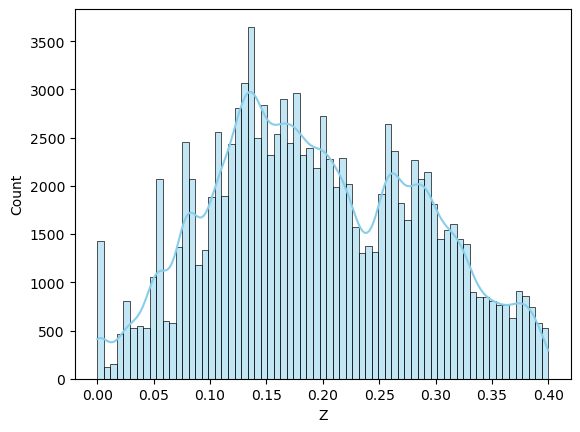

In [10]:
# Seaborn histogram plots the histogram with a KDE fit directly from the Pandas DataFrame 
sns.histplot(data=gama, x="Z", kde=True, color="skyblue")

In [11]:
# Comparing data 

In [16]:
# Create smaller Pandas DataFrame for this next step
smaller_gama = gama.loc[:,('Z', 'DEC', 'logmstar')]
smaller_gama

,Z,DEC,logmstar
0,0.05054,0.72093,9.076030
1,0.33124,0.70594,10.979200
2,0.22936,0.65891,10.791600
3,0.32630,0.80390,11.119700
4,0.07641,0.66580,9.012390
...,...,...,...
113153,0.29884,1.20398,10.410600
113154,0.22929,1.03991,9.689020
113155,0.00006,1.66110,0.464692
113156,0.00034,1.53559,1.253310


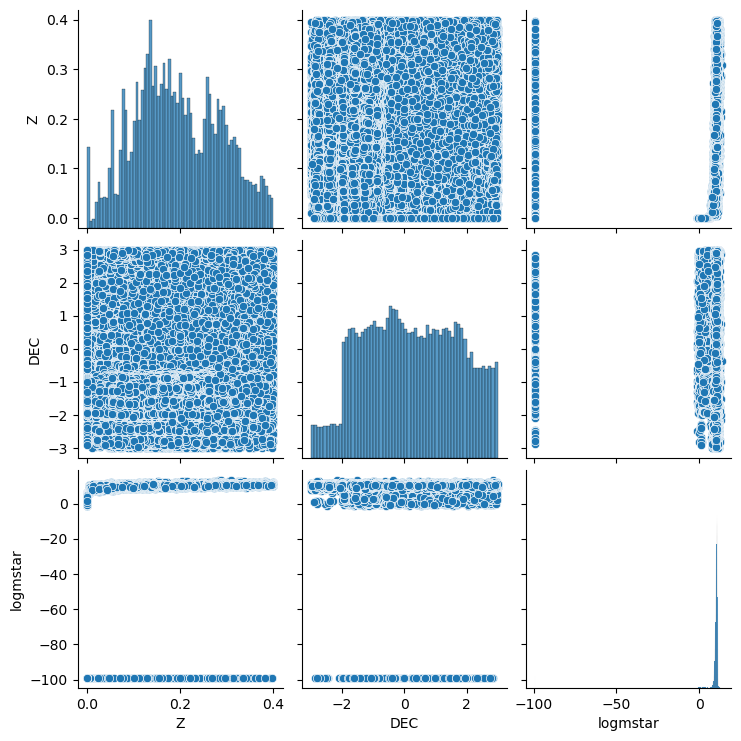

In [17]:
### FIX THIS - CHANGE THE DATAFRAME SO THAT THERE ARE ACTUAL CORRELATIONS !!

# Compare every parameter against the others, including itself (which is therefore a histogram)
sns.pairplot(data=smaller_gama)

In [ ]:
### END HERE OR ADD MORE INFORMATION? MAYBE ON COMPARING TWO PARAMETERS? 